In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [4]:
cv_res = np.load("kmer_cv_results.npy", allow_pickle=True).item()

In [15]:
cv_res["Pos0-A"].keys()

dict_keys(['r', 'r2', 'rmse', 'train_history'])

In [128]:
def plot_metrics(res, metric, title):
    fig = plt.figure(figsize=(15,10),frameon=False)
    
    plt.suptitle(title, fontsize=16)
    for i in range(6):
        plotid = int('33%d'%(i+1))
        ax = fig.add_subplot(plotid)

        base_data = []
        label = None
        for key in res.keys():
            key_ = key.split('-')

            pos = int(key_[0][-1])
            base = key_[-1] #missing from train, present in test

            label = pos
            if pos == i:
                base_data +=[cv_res[key][metric]]
        ax.set_title("Position %d"%(i+1))
        ax.bar([0,1,2,3],base_data, label=label)

        if i==0 or i==3:
            ax.set_ylabel("Correlation Coefficient", fontsize=15)
        ax.set_xticks([0,1,2,3])
        ax.set_xticklabels(["A", "T", "C", "G"])
    
#     plt.tight_layout()
    plt.show()
    plt.close()

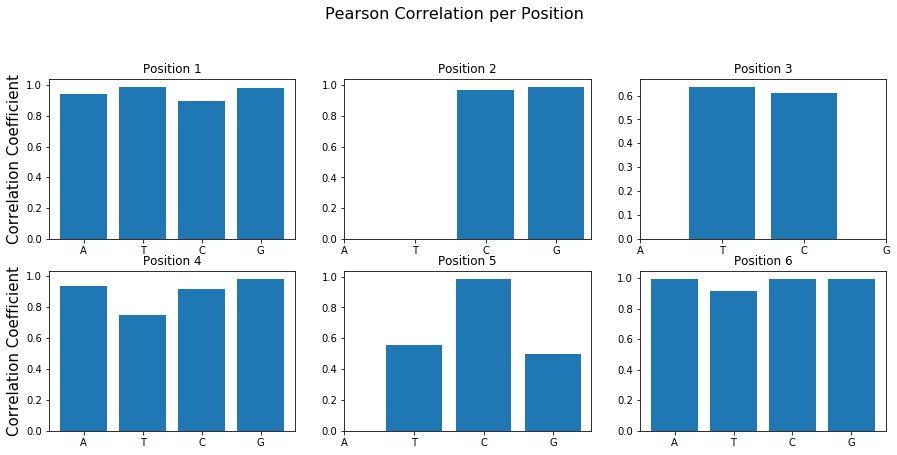

In [129]:
plot_metrics(cv_res, 'r', title="Pearson Correlation per Position")

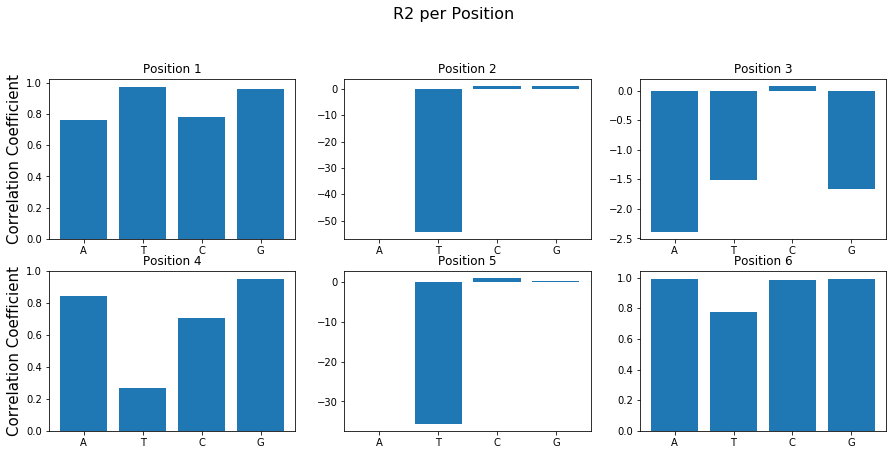

In [130]:
plot_metrics(cv_res, 'r2',title="R2 per Position")

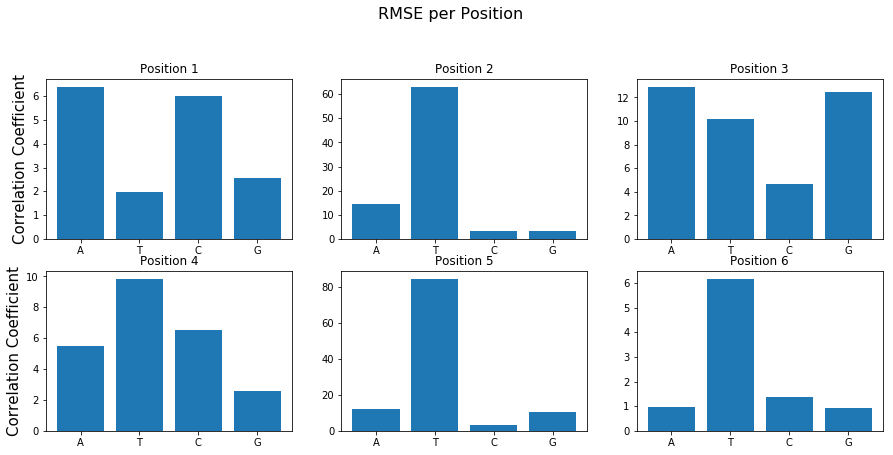

In [131]:
plot_metrics(cv_res, 'rmse', "RMSE per Position")